## Task-D: Collinear features and their effect on linear models

In [326]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

In [327]:
data = pd.read_csv('task_d.csv')

In [328]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [329]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

#### Logistic Regression

1. <b>Finding the Correlation between the features</b>

In [330]:
correlation = data.drop(['target'], axis=1).corr()

In [331]:
correlation

,x,y,z,x*x,2*y,2*z+3*x*x,w
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000


<AxesSubplot:title={'center':'Correlation between features'}>

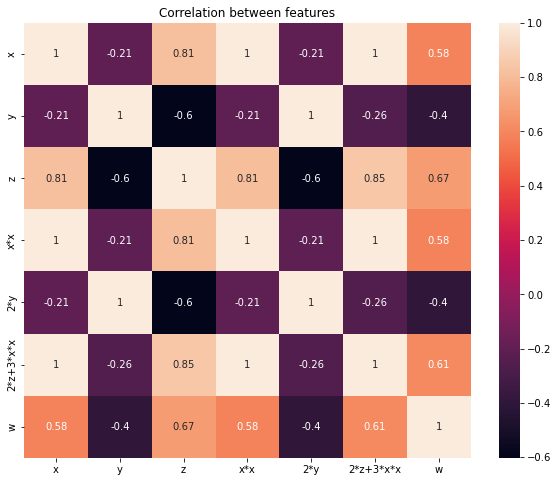

In [332]:
plt.figure(figsize=(10,8))
plt.title("Correlation between features")
sns.heatmap(correlation, xticklabels = True, yticklabels = True , annot= True)

#### 2. Finding the best model for the given data

In [333]:
log_regression = LogisticRegression(random_state=0)
param = np.logspace(-10,10,20)
param_grid = {'C':param}
print(param_grid)

{'C': array([1.00000000e-10, 1.12883789e-09, 1.27427499e-08, 1.43844989e-07,
       1.62377674e-06, 1.83298071e-05, 2.06913808e-04, 2.33572147e-03,
       2.63665090e-02, 2.97635144e-01, 3.35981829e+00, 3.79269019e+01,
       4.28133240e+02, 4.83293024e+03, 5.45559478e+04, 6.15848211e+05,
       6.95192796e+06, 7.84759970e+07, 8.85866790e+08, 1.00000000e+10])}


In [334]:
LR_clf = GridSearchCV(log_regression,param_grid, cv=5)

In [335]:
LR_clf.fit(X,Y)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([1.00000000e-10, 1.12883789e-09, 1.27427499e-08, 1.43844989e-07,
       1.62377674e-06, 1.83298071e-05, 2.06913808e-04, 2.33572147e-03,
       2.63665090e-02, 2.97635144e-01, 3.35981829e+00, 3.79269019e+01,
       4.28133240e+02, 4.83293024e+03, 5.45559478e+04, 6.15848211e+05,
       6.95192796e+06, 7.84759970e+07, 8.85866790e+08, 1.00000000e+10])})

In [336]:
LR_clf.best_params_

{'C': 1e-10}

<b>3. Getting the weights with the original data</b>

In [337]:
best_model = LogisticRegression(C=1e-10, random_state = 0)
best_model.fit(X,Y)
predicted_values = best_model.predict(X)

In [338]:
best_model_accuracy = accuracy_score(predicted_values,Y)
print(best_model_accuracy)

1.0


In [339]:
weights = best_model.coef_[0]
print(weights)

[ 3.64145071e-09 -3.45342165e-09  4.84995111e-09  3.59784968e-09
 -3.45342165e-09  3.82364313e-09  3.20875164e-09]


4. <b>Modifying original data</b>

In [340]:
X_new = X + 10**-2

In [341]:
best_model_edited = best_model.fit(X_new,Y)
predicted_values_edited = best_model.predict(X)

In [342]:
best_model_accuracy_edited = accuracy_score(predicted_values_edited,Y)
print(best_model_accuracy_edited)

1.0


In [343]:
weights_edited = best_model_edited.coef_[0]
print(weights_edited)

[ 3.64145070e-09 -3.45342164e-09  4.84995109e-09  3.59784967e-09
 -3.45342164e-09  3.82364312e-09  3.20875163e-09]


5. <b> Checking deviations in metric and weights </b>

In [344]:
print("Difference between accuracy of best_model and best_model_edited is: \n{}".format(best_model_accuracy-best_model_accuracy_edited))

Difference between accuracy of best_model and best_model_edited is: 
0.0


In [345]:
abs_difference = abs(weights-weights_edited)
print("Absolute difference between accuracy of best_model and best_model_edited is: \n{}".format(abs_difference))

Absolute difference between accuracy of best_model and best_model_edited is: 
[1.12721006e-17 1.06900562e-17 1.50130113e-17 1.11371370e-17
 1.06900562e-17 1.18360744e-17 9.93268140e-18]


In [346]:
n=len(weights)
percent_change=[]
for i in range(n):
    percent_change.append(((abs_difference[i]/(abs(weights[i])))*100))     #percent change = (x2-x1/x1)*100    

In [347]:
percent_change

[3.0954972457091706e-07,
 3.0954969676079734e-07,
 3.095497453303721e-07,
 3.0954981501337034e-07,
 3.0954969676079734e-07,
 3.095496635388072e-07,
 3.0954971001124375e-07]

In [348]:
features = data.columns.values[:-1]

In [349]:
sort_index = np.argsort(percent_change)
sort_index=sort_index[:2:-1]   #Getting top 4 indices

In [350]:
sort_index

array([3, 2, 0, 6], dtype=int64)

In [351]:
print("top 4 features which have higher % change in weights are:")
for j in sort_index:
    print(features[j])

top 4 features which have higher % change in weights are:
x*x
z
x
w


#### Task: 2 Linear SVM

#### 2. Finding the best model for the given data

In [352]:
svm = SVC(kernel='linear', random_state = 0)
print(param_grid)

{'C': array([1.00000000e-10, 1.12883789e-09, 1.27427499e-08, 1.43844989e-07,
       1.62377674e-06, 1.83298071e-05, 2.06913808e-04, 2.33572147e-03,
       2.63665090e-02, 2.97635144e-01, 3.35981829e+00, 3.79269019e+01,
       4.28133240e+02, 4.83293024e+03, 5.45559478e+04, 6.15848211e+05,
       6.95192796e+06, 7.84759970e+07, 8.85866790e+08, 1.00000000e+10])}


In [353]:
SVM_clf = GridSearchCV(svm,param_grid, cv=5)

In [354]:
SVM_clf.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=0),
             param_grid={'C': array([1.00000000e-10, 1.12883789e-09, 1.27427499e-08, 1.43844989e-07,
       1.62377674e-06, 1.83298071e-05, 2.06913808e-04, 2.33572147e-03,
       2.63665090e-02, 2.97635144e-01, 3.35981829e+00, 3.79269019e+01,
       4.28133240e+02, 4.83293024e+03, 5.45559478e+04, 6.15848211e+05,
       6.95192796e+06, 7.84759970e+07, 8.85866790e+08, 1.00000000e+10])})

In [355]:
SVM_clf.best_params_

{'C': 0.026366508987303555}

<b>3. Getting the weights with the original data</b>

In [356]:
best_model = SVC(C=0.026366508987303555, kernel='linear', random_state = 0)
best_model.fit(X,Y)
predicted_values = best_model.predict(X)

In [357]:
best_model_accuracy = accuracy_score(predicted_values,Y)
print(best_model_accuracy)

1.0


In [358]:
weights = best_model.coef_[0]
print(weights)

[ 0.16883905 -0.24906502  0.48486823  0.15792086 -0.24906502  0.20066943
  0.14301976]


4. <b>Modifying original data</b>

In [359]:
best_model_edited = best_model.fit(X_new,Y)
predicted_values_edited = best_model.predict(X)

In [360]:
best_model_accuracy_edited = accuracy_score(predicted_values_edited,Y)
print(best_model_accuracy_edited)

1.0


In [361]:
weights_edited = best_model_edited.coef_[0]
print(weights_edited)

[ 0.16883905 -0.24906503  0.48486823  0.15792086 -0.24906503  0.20066943
  0.14301975]


5. <b> Checking deviations in metric and weights </b>

In [362]:
print("Difference between accuracy of best_model and best_model_edited is: \n{}".format(best_model_accuracy-best_model_accuracy_edited))

Difference between accuracy of best_model and best_model_edited is: 
0.0


In [363]:
abs_difference = abs(weights-weights_edited)
print("Absolute difference between accuracy of best_model and best_model_edited is: \n{}".format(abs_difference))

Absolute difference between accuracy of best_model and best_model_edited is: 
[1.61718852e-09 3.07965140e-09 2.96370656e-09 8.56852894e-10
 3.07965140e-09 1.12899040e-09 6.67971711e-09]


In [364]:
n=len(weights)
percent_change=[]
for i in range(n):
    percent_change.append((abs_difference[i]/abs(weights[i]))*100)     #percent change = x2-x1/x1

In [365]:
percent_change

[9.57828505532657e-07,
 1.2364848951726265e-06,
 6.112395823338648e-07,
 5.425837174517666e-07,
 1.2364848951726265e-06,
 5.626120451915128e-07,
 4.670485423457468e-06]

In [366]:
sort_index = np.argsort(percent_change)
sort_index=sort_index[:2:-1]   #Getting top 4 indices

In [367]:
sort_index

array([6, 4, 1, 0], dtype=int64)

In [368]:
print("top 4 features which have higher % change in weights are:")
for j in sort_index:
    print(features[j])

top 4 features which have higher % change in weights are:
w
2*y
y
x


#### Observations:
1. Some features in our dataset is highly correlated as per the correlation matrix
2. After the pertubation test, weights of Logistic Regression and SVM only have a very small change in weights. So, the features are not collinear